Failure probability: 	 2.96732e-02
Reliability index: 	 1.88562
Design point in the standard space:
[-1.33333,-1.33333]
Design point in the design space:
[4,4]
Failure probability: 	 2.96732e-02
Reliability index: 	 1.88562
Design point in the standard space:
[-1.33333,-1.33333]
Design point in the design space:
[4,4]


NameError: name 'dist_Cc' is not defined

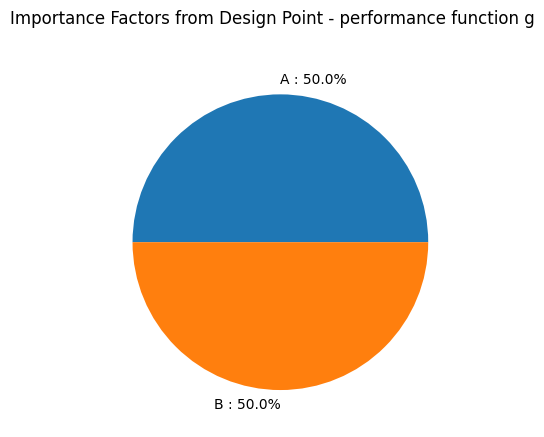

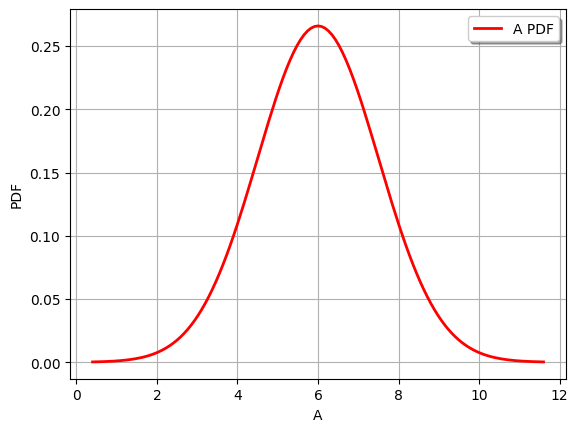

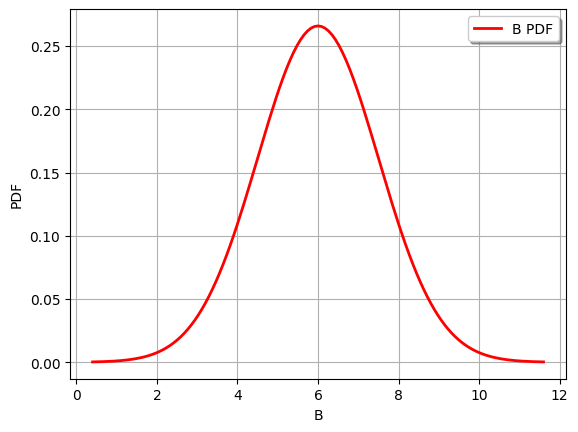

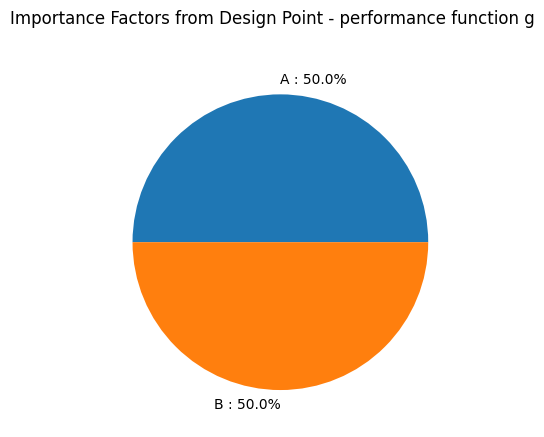

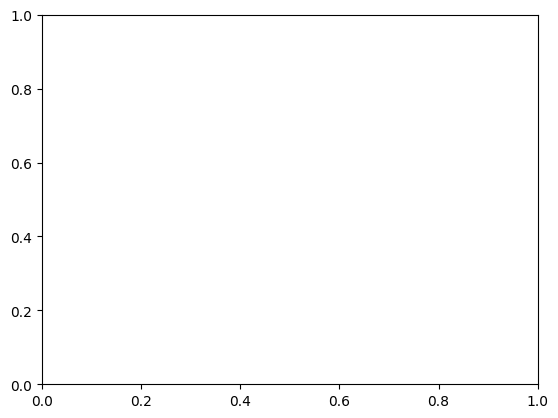

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sat Aug 31 20:30:57 2019

@original author: Ivan Depina
revised by Yutao Pan 2023
"""

# FORM example G=A+B-8

# Import OpenTURNS as a module-----tell the server that you are going to cast these spells-------
import openturns as ot #here you use ot as the abbreviation of openturns, with ot. you call functions 
                       #in openturns,  it's like when you cast a spell, you need to specify the spirits
                       # that will hid your call
from openturns.viewer import View #it is a configurated agreement of view functions, it shortens the code
# Import additonal modules if necessary
import matplotlib.pyplot as plt
# constant values
# Create the marginal distributions of the parameters--------------------------
# A - Normally distributed
dist_A = ot.Normal(6,1.5) #here you created a Normal distribution with mean of 6 and standard deviation of 1.5
dist_A.setDescription('A') #here you use A as a symbol of that distribution
# B- Normally distributed
dist_B = ot.Normal(6, 1.5)
dist_B.setDescription('B')


# Create the joint distribution of the random parameters-----------------------
# Independence is assumed between the parameters
marginals = [dist_A, dist_B]
distribution = ot.ComposedDistribution(marginals)
distribution.setDescription(['A','B'])

# Create the probabilistic model-----------------------------------------------
model = ot.SymbolicFunction(['A','B'], ['8-A-B'])

# Create the event we want to estimate the probability-------------------------
# The probability is defined here as P(g<0)
vect = ot.RandomVector(distribution)
G = ot.CompositeRandomVector(model, vect)
#event = ot.Event(G, ot.Greater(), 0)
event =  ot.ThresholdEvent(G, ot.Greater(), 0)
event.setName("performance function g")

# FORM method parameters-------------------------------------------------------
# Define a solver
optimAlgo = ot.Cobyla()
# Define converegnce parameters
optimAlgo.setMaximumEvaluationNumber(1000)
optimAlgo.setMaximumAbsoluteError(1.0e-10)
optimAlgo.setMaximumRelativeError(1.0e-10)
optimAlgo.setMaximumResidualError(1.0e-10)
optimAlgo.setMaximumConstraintError(1.0e-10)

# Run FORM analysis------------------------------------------------------------
algo = ot.FORM(optimAlgo, event, distribution.getMean())
algo.run()

# Get the results of the analysis----------------------------------------------
result = algo.getResult()

# Get the probability 
pf_FORM=result.getEventProbability()
print('Failure probability: \t %.5e' % pf_FORM)

# Hasofer reliability index
beta_FORM=result.getHasoferReliabilityIndex()
print('Reliability index: \t %.5f' % beta_FORM)

# Design point in the standard U* space
print("Design point in the standard space:")
print(result.getStandardSpaceDesignPoint())

# Design point in the physical X space
print("Design point in the design space:")
print(result.getPhysicalSpaceDesignPoint())

# Draw the importance factors--------------------------------------------------
alpha=result.drawImportanceFactors()
fig= plt.figure()
aA=fig.add_subplot(111)
_ = View(alpha, figure=fig, axes=[aA])
fig.savefig(r'ImportanceFactors.png',dpi=600)

# Additional plots-------------------------------------------------------------
# Plot the pdf of A
fig= plt.figure()
aA=fig.add_subplot(111)
_ = View(dist_A.drawPDF(), figure=fig, axes=[aA])
fig.savefig(r'NPDF.png',dpi=600)

# Plot the pdf of B
fig= plt.figure()
aA=fig.add_subplot(111)
_ = View(dist_B.drawPDF(), figure=fig, axes=[aA])
fig.savefig(r'CcPDF.png',dpi=600)




#--SORM-------------------~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# Run SORM analysis------------------------------------------------------------
algo = ot.SORM(optimAlgo, event, distribution.getMean())
algo.run()

# Get the results of the analysis----------------------------------------------
result = algo.getResult()

# Get the probability with Tvedt approximation
pf_SORM=result.getEventProbabilityTvedt()
print('Failure probability: \t %.5e' % pf_SORM)
# Hasofer reliability index
beta_SORM=result.getGeneralisedReliabilityIndexTvedt()
print('Reliability index: \t %.5f' % beta_SORM)

# Design point in the standard U* space
print("Design point in the standard space:")
print(result.getStandardSpaceDesignPoint())

# Design point in the physical X space
print("Design point in the design space:")
print(result.getPhysicalSpaceDesignPoint())

# Draw the importance factors--------------------------------------------------
alpha=result.drawImportanceFactors()
fig= plt.figure()
ax1=fig.add_subplot(111)
_ = View(alpha, figure=fig, axes=[ax1])
fig.savefig(r'ImportanceFactorsSORM.png',dpi=600)


# Additional plots-------------------------------------------------------------
# Plot the pdf of N
fig= plt.figure()
ax1=fig.add_subplot(111)
_ = View(dist_Cc.drawPDF(), figure=fig, axes=[ax1])
fig.savefig(r'NPDF.png',dpi=600)

# Plot the pdf of Cc
fig= plt.figure()
ax1=fig.add_subplot(111)
_ = View(dist_Cc.drawPDF(), figure=fig, axes=[ax1])
fig.savefig(r'CcPDF.png',dpi=600)

# Plot the pdf of eo
fig= plt.figure()
ax1=fig.add_subplot(111)
_ = View(dist_eo.drawPDF(), figure=fig, axes=[ax1])
fig.savefig(r'eoPDF.png',dpi=600)

# Plot the pdf of H
fig= plt.figure()
ax1=fig.add_subplot(111)
_ = View(dist_H.drawPDF(), figure=fig, axes=[ax1])
fig.savefig(r'HPDF.png',dpi=600)
# Plot the pdf of po
fig= plt.figure()
ax1=fig.add_subplot(111)
_ = View(dist_po.drawPDF(), figure=fig, axes=[ax1])
fig.savefig(r'poPDF.png',dpi=600)
# Plot the pdf of dp
fig= plt.figure()
ax1=fig.add_subplot(111)
_ = View(dist_dp.drawPDF(), figure=fig, axes=[ax1])
fig.savefig(r'poPDF.png',dpi=600)